# Homework 2: Introduction to SVMs

------------------------------------------------------
*Machine Learning, Master in Big Data Analytics, 2017-2018*

*Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------

#### Sudent: ANTONIO MIRANDA ESCALADA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# use seaborn plotting defaults
import seaborn as sns; sns.set()

## A synthetic dataset

In the first part of this homework, you will work with the following dataset

In [2]:
data=np.load('DataSet1.npz') 

X_train=data['arr_0']
Y_train=data['arr_1']
X_test=data['arr_2']


Let's plot it to have an idea about how it looks:

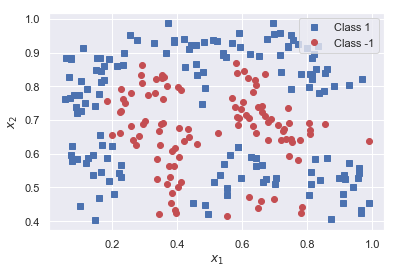

In [3]:
min1=np.min(X_train[:,0])
max1=np.max(X_train[:,0])
min2=np.min(X_train[:,1])
max2=np.max(X_train[:,1])



## Plot Data
index=(Y_train==1).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'s',label="Class 1")
index=(Y_train==0).reshape(Y_train.shape[0],)
plt.plot(X_train[index,0],X_train[index,1],'ro',label="Class -1")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.grid(True)
plt.legend()
plt.rcParams["figure.figsize"] = [8,8]

** Question 1 (1 point)** Hold out part of the training data to create a validation set. For instance, take the 20% of the data points at random for validation.

In [4]:
from sklearn.model_selection import train_test_split
X_samp, X_val, Y_samp, Y_val = train_test_split(X_train,
                                                Y_train, 
                                                test_size=0.2,
                                                random_state=0)

** Question 2 (2 points)** Train a SVM with a linear kernel. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $C$ and analyze the evolution of the number of support vectors as you vary this quantity. Explain the results!

Compute and plot the classification error rate for both training and validation sets as a function of $C$.

Do you think a linear kernel is adequate in this case?

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:            
        #If no figure handle is provided, it opens the current figure
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)    #30 points in the grid axis
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)                 
    # We create a grid with the x,y coordinates defined above
    
    # From the grid to a list of (x,y) values. 
    # Check Numpy help for ravel()
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T 
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    # In levels we provide a list of floating point numbers indicating 
    #the level curves to draw, in increasing order; e.g., 
    # to draw just the zero contour pass
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, marker='p')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    return P


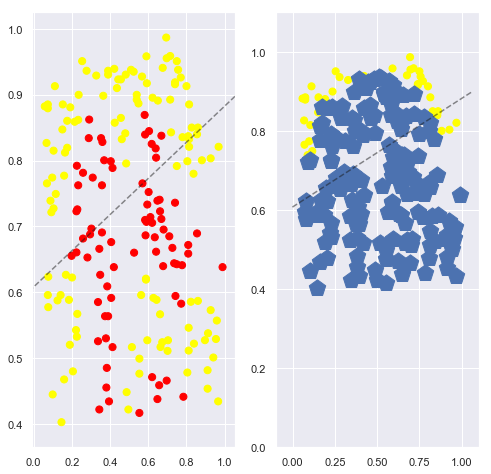

In [6]:
from sklearn.svm import SVC
from matplotlib.pyplot import xlim, ylim

model_initial = SVC(kernel='linear', C=10)
model_initial.fit(X_samp, Y_samp.reshape(200,))

f, axes = plt.subplots(1, 2)
axes[0].scatter(X_samp[:, 0], X_samp[:, 1],
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_initial,
                           ax=axes[0], plot_support=False)
axes[1].scatter(X_samp[:, 0], X_samp[:, 1],
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_initial,
                           ax=axes[1], plot_support=True)

plt.rcParams["figure.figsize"] = [8,8]

W=model_initial.coef_[0]
I=model_initial.intercept_
a = -W[0]/W[1]
b = I[0]/W[1]
x = np.linspace(-1135,-1120, 1000)
y = a*x - b

xlim(right=1.1)  
xlim(left=-0.1) 
ylim(top=1.1)
ylim(bottom=0) 
plt.plot(y)
plt.show()

In [9]:
# Study evolution of the number of support vector, train and test errors with C
sv1 = []
sv2 = []
svt = []
train_errors = []
test_errors = []
c_min = -4
c_max = 6
C_range = np.logspace(c_min, c_max, c_max - c_min + 1)
for i in range(0, c_max - c_min + 1):
    c = C_range[i]
    model = SVC(kernel='linear', C=c)
    model.fit(X_samp, Y_samp.reshape(200,))
    sv1.append(model.n_support_[0])
    sv2.append(model.n_support_[1])
    svt.append(model.n_support_[0] + model.n_support_[1])

    train_errors.append(model.score(X_samp, Y_samp))
    test_errors.append(model.score(X_val, Y_val))

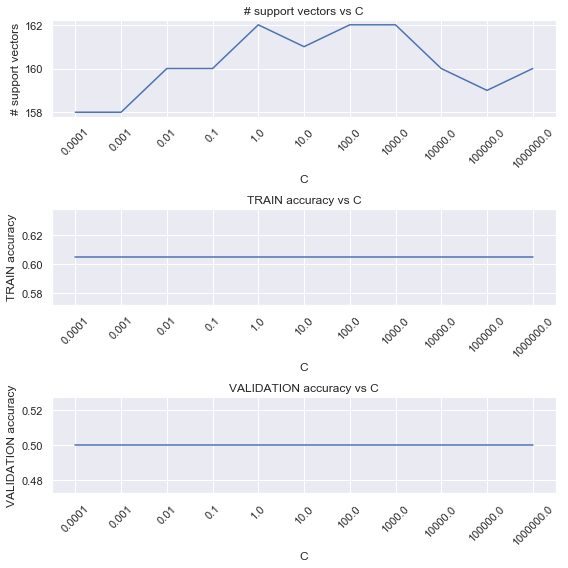

In [24]:
from matplotlib.pyplot import xticks, xlabel, ylabel, title

plt.subplot(3, 1, 1)
plt.plot(svt)
title('# support vectors vs C')
xticks(list(range(0,c_max - c_min + 1)), C_range, rotation=45)
xlabel('C')
ylabel('# support vectors')

plt.subplot(3, 1, 2)
plt.plot(train_errors)
title('TRAIN accuracy vs C')
xticks(list(range(0,c_max - c_min + 1)), C_range, rotation=45)
xlabel('C')
ylabel('TRAIN accuracy')

plt.subplot(3, 1, 3)
plt.plot(test_errors)
title('VALIDATION accuracy vs C')
xticks(list(range(0,c_max - c_min + 1)), C_range, rotation=45)
xlabel('C')
ylabel('VALIDATION accuracy')

plt.tight_layout()
plt.show()

It does not matter how we change the penalty term, the validation error is always 0.5. That means that using a linear kernel in this dataset equals to tossing a coin. 

A linear kernel is obviously not a right choice for this dataset, since its separation is not linear. 

** Question 3 (2 points)** Train a SVM with a RBF kernel with bandwith $\gamma$. Plot the decision boundary and the $\pm 1$-distance to boundary contour levels. 

Use different values of $(C,\gamma)$ and analyze the evolution of the number of support vectors as you vary these quantities. For instance, fix $\gamma=1$ and vary $C$ and the other way around. Explain the results! Plotting the decision boundary and support vectors will help you to understand what's going on.

Note: check [here](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) to see how to vary $\gamma$.

For different values of $\gamma$, compute and plot the classification error rate for both training and validation sets as a function of $C$.


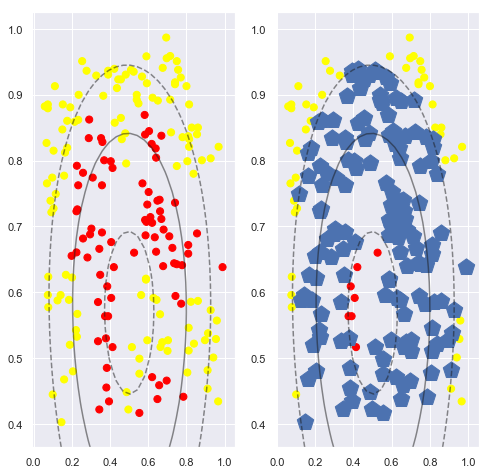

In [11]:
# gamma = 1 / (n_features * X.std())
from sklearn.svm import SVC

model_rbf = SVC(kernel='rbf', C=1, gamma='scale')
model_rbf.fit(X_samp, Y_samp.reshape(200,))

# plot 
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_samp[:, 0], X_samp[:, 1], 
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, ax=axes[0], plot_support=False)

axes[1].scatter(X_samp[:, 0], X_samp[:, 1], 
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, ax=axes[1], plot_support=True)

plt.rcParams["figure.figsize"] = [8,8]

In [26]:
# Use different values of (𝐶,𝛾) and analyze the evolution of the
# number of support vectors as you vary these quantities.
# For instance, fix 𝛾=1 and vary 𝐶 and the other way around. 
# Explain the results!
# Plotting the decision boundary and support vectors will help you
# to understand what's going on.

# fix g
gamma = 1

sv1_rbf_c = []
sv2_rbf_c = []
svt_rbf_c = []
train_errors_rbf_c = []
test_errors_rbf_c = []
model_rbf_c = []
c_min = -4
c_max = 9
C_range = np.logspace(c_min, c_max, c_max - c_min + 1)
c_r_plot = ['10e-4','10e-3','10e-2','10e-1','10e0','10e1',
            '10e2','10e3','10e4','10e5','10e6', '10e7','1e8','10e9']
for i in range(0, c_max - c_min + 1):
    c = C_range[i]
    model = SVC(kernel='rbf', C=c, gamma=gamma)
    model.fit(X_samp, Y_samp.reshape(200,))
    
    model_rbf_c.append(model)
    sv1_rbf_c.append(model.n_support_[0])
    sv2_rbf_c.append(model.n_support_[1])
    svt_rbf_c.append(model.n_support_[0] + model.n_support_[1])

    train_errors_rbf_c.append(model.score(X_samp, Y_samp))
    test_errors_rbf_c.append(model.score(X_val, Y_val))
    
# fix c
c = 1

sv1_rbf_g = []
sv2_rbf_g = []
svt_rbf_g = []
train_errors_rbf_g = []
test_errors_rbf_g = []
model_rbf_g = []
g_min = -4
g_max = 9
gamma_range = np.logspace(g_min, g_max, g_max - g_min + 1)
g_r_plot = ['10e-4','10e-3','10e-2','10e-1','10e0',
            '10e1','10e2','10e3','10e4','10e5','10e6', '10e7','1e8','10e9']
for i in range(0, g_max - g_min + 1):
    g = gamma_range[i] 
    model = SVC(kernel='rbf', C=c, gamma=g)
    model.fit(X_samp, Y_samp.reshape(200,))
    
    model_rbf_g.append(model)
    sv1_rbf_g.append(model.n_support_[0])
    sv2_rbf_g.append(model.n_support_[1])
    svt_rbf_g.append(model.n_support_[0] + model.n_support_[1])

    train_errors_rbf_g.append(model.score(X_samp, Y_samp))
    test_errors_rbf_g.append(model.score(X_val, Y_val))
    

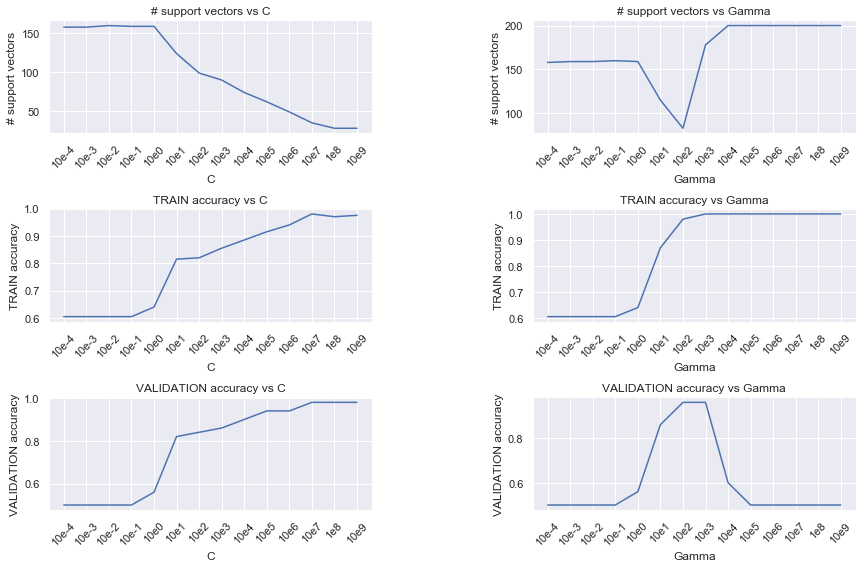

In [27]:
from matplotlib.pyplot import xticks, xlabel, ylabel, title

plt.subplot(3, 2, 1)
plt.plot(svt_rbf_c)
title('# support vectors vs C')
xticks(list(range(0,c_max - c_min + 1)), c_r_plot, rotation=45)
xlabel('C')
ylabel('# support vectors')

plt.subplot(3, 2, 3)
plt.plot(train_errors_rbf_c)
title('TRAIN accuracy vs C')
xticks(list(range(0,c_max - c_min + 1)), c_r_plot, rotation=45)
xlabel('C')
ylabel('TRAIN accuracy')

plt.subplot(3, 2, 5)
plt.plot(test_errors_rbf_c)
title('VALIDATION accuracy vs C')
xticks(list(range(0,c_max - c_min + 1)), c_r_plot, rotation=45)
xlabel('C')
ylabel('VALIDATION accuracy')

plt.subplot(3, 2, 2)
plt.plot(svt_rbf_g)
title('# support vectors vs Gamma')
xticks(list(range(0,g_max - g_min + 1)), g_r_plot, rotation=45)
xlabel('Gamma')
ylabel('# support vectors')

plt.subplot(3, 2, 4)
plt.plot(train_errors_rbf_g)
title('TRAIN accuracy vs Gamma')
xticks(list(range(0,g_max - g_min +1)), g_r_plot, rotation=45)
xlabel('Gamma')
ylabel('TRAIN accuracy')

plt.subplot(3, 2, 6)
plt.plot(test_errors_rbf_g)
title('VALIDATION accuracy vs Gamma')
xticks(list(range(0,g_max - g_min + 1)), g_r_plot, rotation=45)
xlabel('Gamma')
ylabel('VALIDATION accuracy')

plt.tight_layout()
plt.subplots_adjust(left=0.1, right=1.5, wspace=0.5)

plt.show()

62


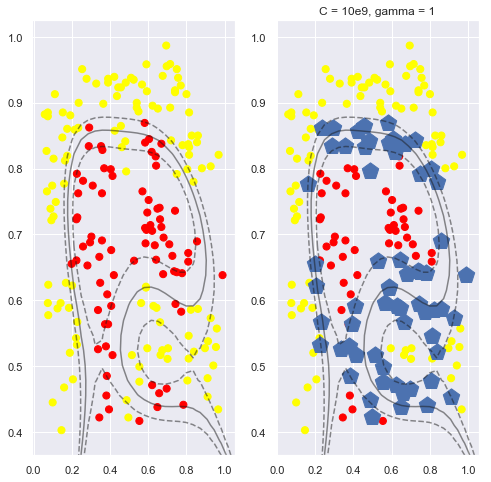

In [41]:
model_rbf = SVC(kernel='rbf', C=10e4, gamma=1)
model_rbf.fit(X_samp, Y_samp.reshape(200,))

# plot 
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_samp[:, 0], X_samp[:, 1], 
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, ax=axes[0], plot_support=False)

axes[1].scatter(X_samp[:, 0], X_samp[:, 1],
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, ax=axes[1], plot_support=True)

plt.rcParams["figure.figsize"] = [8,8]
plt.title('C = 10e9, gamma = 1')
print(model_rbf.n_support_[0] + model_rbf.n_support_[1])

Text(0.5, 1.0, 'C = 1, gamma = 10e2')

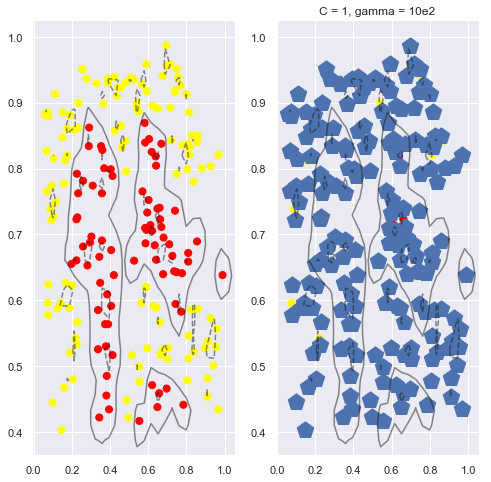

In [59]:
model_rbf = SVC(kernel='rbf', C=1, gamma=10e2)
model_rbf.fit(X_samp, Y_samp.reshape(200,))

# plot 
f, axes = plt.subplots(1, 2)
axes[0].scatter(X_samp[:, 0], X_samp[:, 1], 
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, ax=axes[0], plot_support=False)

axes[1].scatter(X_samp[:, 0], X_samp[:, 1], 
                c=Y_samp.reshape(200,), s=50, cmap='autumn')
plot_svc_decision_function(model_rbf, ax=axes[1], plot_support=True)

plt.rcParams["figure.figsize"] = [8,8]
plt.title('C = 1, gamma = 10e2')

The **gamma** parameter sets the radius of influence of the training points. The lower the value of gamma, the higher the radius of influence. When gamma is too small, the model cannot capture the non-linear shape of the data. And when it is too large, the points do not have influence at all and we overfit! The number of support vectors then increase.

With intermediate values of gamma we are able to reach a good validation accuracy. This occurs when the number of support vectors is small. Only the points that truly mark the boundary are selected as support vectors (note that since our data is so complex, the decrease in the number of support vector is not very high).

On the other hand, the **C parameter** affects how much we penalized the misclassified points. With small values, the margin is large and we select a simple boundary, which is not valid for our dataset. With large **C** values, the margin is smaller and the boundary can be much more complex. When the margin is narrow, the number of support vectors decrease, since the points far away from the boundary are not used as support vectors. However, when the margin is wider, almost all points are used as support vectors.  

## A real dataset: Breast Cancer Diagnostic Data Set


The [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) contains 10 features related to breast tumors that have been diagnosed as benign or malignant. You have a description of the 10 features in the link above. In the same link you can download the data set as a CVS file.

** Question 4 (1 point)** Hold out part of the training data to create a **test set**. For instance, take the 20% of the data points at random to create the test set.

Also, normalize the data so every feature has zero mean and unit variance. Be aware that both validation and test data must be normalized using the training mean & variance for every feature.

In [2]:
import pandas as pd
cancer = pd.read_csv('breast-cancer-wisconsin.data', sep=',',
                     names=['ID','Clump_Thickness','Uniformity_Cell_Size',
                            'Uniformity_Cell_Shape','Marginal_Adhesion',
                            'Single_Epithelial_Cell_Size','Bare_Nuclei',
                            'Bland_Chromatin',
                            'Normal_Nucleoli','Mitoses','Class']
).replace('?', 0)

cancer['Bare_Nuclei'] = cancer['Bare_Nuclei'].astype(np.int64)
Y = cancer.Class
X = cancer.drop(['Class', 'ID'], axis = 1)

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Normalize
means = X_train.mean()
std = X_train.std()

X_train_norm = (X_train - means) / std
X_test_norm = (X_test - means) / std

** Question 5 (4 points)**

Using the test set, compare the classification error for different SVM models in which free parameters ($C$ and kernel parameters) are chosen using [5-fold cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html). 

In [3]:
#Your code here
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = KFold(5)

model_linear = SVC(kernel='linear')   
print('training linear SVM')
C_range = np.logspace(-2, 2, 5)
param_grid_linear = dict(C=C_range)
clf_linear = GridSearchCV(model_linear, 
                          param_grid_linear,
                          n_jobs=1,
                          cv=cv,
                          verbose=0)
clf_linear.fit(X_train_norm, Y_train)
print(clf_linear.best_params_)

model_rbf = SVC(kernel='rbf')   
print('training gaussian SVM')
C_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 3, 6)
param_grid_rbf = dict(gamma=gamma_range, C=C_range)
clf_rbf = GridSearchCV(model_rbf,
                       param_grid_rbf,
                       n_jobs=1,
                       refit=True,
                       cv=cv,
                       verbose=0)
clf_rbf.fit(X_train_norm, Y_train)
print(clf_rbf.best_params_)

model_poly = SVC(kernel='poly')   
print('training polynomial SVM')
C_range = np.logspace(-2, 2, 5)
gamma_range = np.logspace(-2, 3, 6)
coef0_range = np.logspace(-1,1,3)
param_grid_poly = dict(gamma=gamma_range, C=C_range, coef0 = coef0_range)
clf_poly = GridSearchCV(model_poly,
                        param_grid_poly,
                        n_jobs=1,
                        cv=cv,
                        verbose = 0)
clf_poly.fit(X_train_norm, Y_train)
print(clf_poly.best_params_)

training linear SVM
{'C': 0.01}
training gaussian SVM
{'C': 0.1, 'gamma': 0.1}
training polynomial SVM
{'C': 0.01, 'coef0': 10.0, 'gamma': 0.01}


In [4]:
# Compare test errors
print('Linear kernel: ', clf_linear.score(X_test_norm, Y_test))
print('Gaussian kernel: ', clf_rbf.score(X_test_norm, Y_test))
print('Polynomoial kernel: ', clf_poly.score(X_test_norm, Y_test))

Linear kernel:  0.9785714285714285
Gaussian kernel:  0.9642857142857143
Polynomoial kernel:  0.9785714285714285


In [5]:
clf_linear.best_params_

{'C': 0.01}

In [6]:
clf_rbf.best_params_

{'C': 0.1, 'gamma': 0.1}

In [7]:
clf_poly.best_params_

{'C': 0.01, 'coef0': 10.0, 'gamma': 0.01}

The errors are almost the same. Note that the **gamma and C parameters** are quite small, so the boundary chosen in all cases is not very complex, because points have radius of influence and the margin is large. That could explain why the three kernels have been able to achieve a similar performance: the three of them have found that simple boundary.
In fact, the polynomial and linear kernel may be using the exact same boundary. 

A reason for this behaviour is that, if we PCA-transform the data and plot the first two first Principal Components, we observe that the train and test data are linearly separable. 